Data Mining - Week 6:
         
         Binding Rules Exercise
        
         In this exercise, we will use the **Apriori** algorithm on a database containing supermarket purchase transactions.
      
         Data:
        
         * Each row represents a transaction and each column corresponds to a purchased product. The cells contain a sequence of products purchased in each transaction, otherwise the value is null.
       
         Data was obtained from Kaggle https://www.kaggle.com/code/timothyabwao/market-basket-analysis-using-the-apriori-algorithm/data and is available at this link https: //raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/market-basket-optimisation.csv)
       

### Libraries and database

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)

In [41]:
!pip -qq install apyori
import apyori

In [42]:
# Each object represents a purchase or transaction, and contains the name of one or more products that are part of the purchase.

url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/market-basket-optimisation.csv'
market = pd.read_csv(url, header=None)
market.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
len(market)

7501

In [44]:
for index in market.columns:
  market[index] = market[index].str.strip() # Remove values with right or left spaces using the strip function.

In [45]:
items = market.melt()['value'].dropna().sort_values() # How many different products are in the base and what they are. Melt function: join values. Sort_values function: sort
print('There are {} different products:\n {}'.format(items.nunique(), items.unique()))

There are 119 different products:
 ['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffin

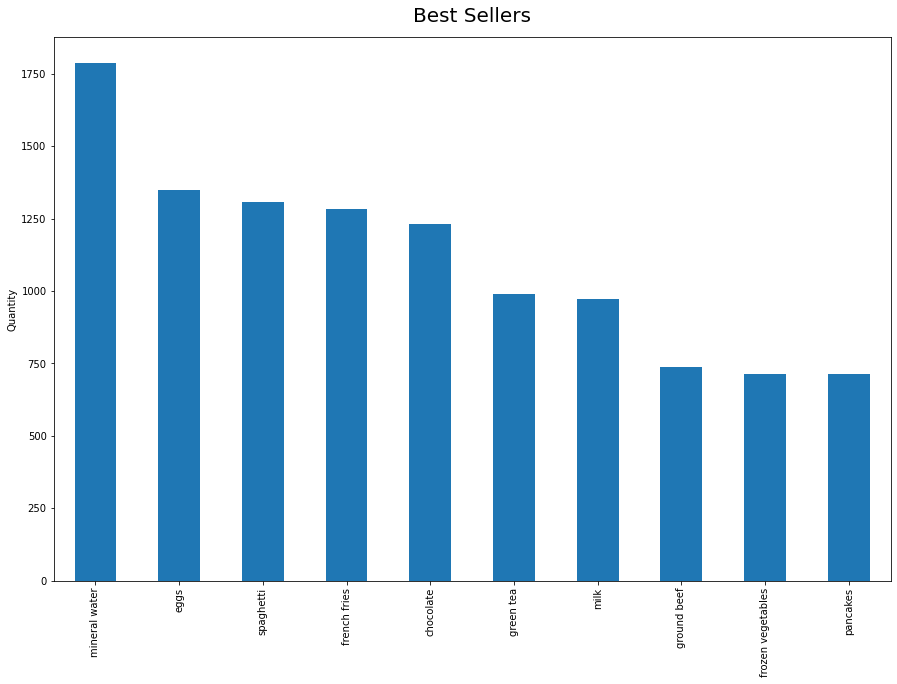

In [46]:
quantity_items = items.value_counts()

bar = quantity_items.nlargest(10).plot(kind = 'bar') 
bar.set_title('Best Sellers', size = 20, weight = 500, pad = 15)
bar.set_ylabel('Quantity')
plt.show()

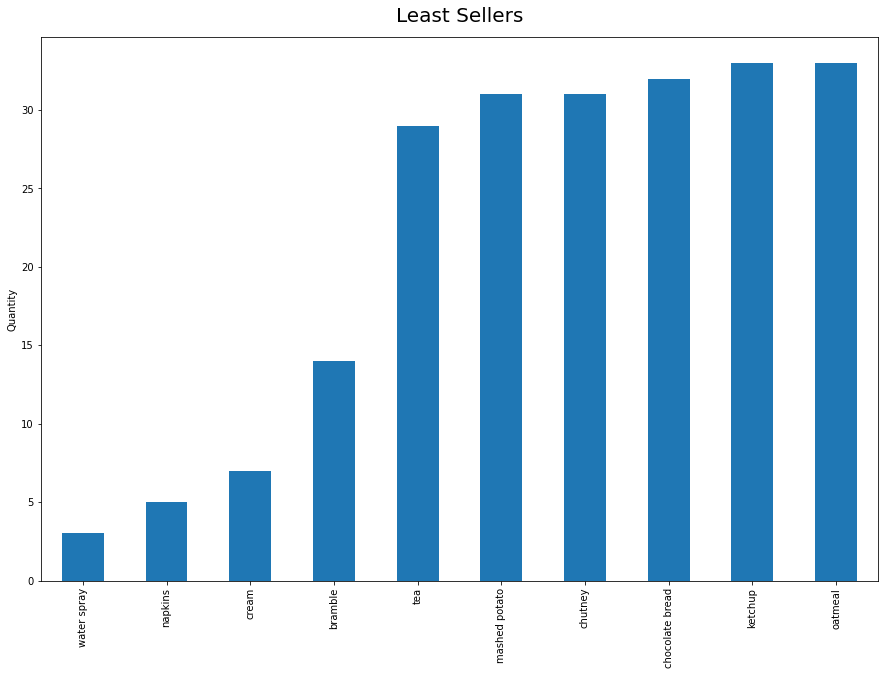

In [47]:
quantity_items = items.value_counts()

bar = quantity_items.nsmallest(10).plot(kind = 'bar') 
bar.set_title('Least Sellers', size = 20, weight = 500, pad = 15)
bar.set_ylabel('Quantity')
plt.show()

In [48]:
quantity_per_basket = market.notna().apply(sum, axis = 1) # Number of non-null items

In [49]:
baskets = [set(row.dropna()) for _, row in market[quantity_per_basket > 1].iterrows()] # Items that have more than one product per transaction.
baskets[:5]

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'}]

In [50]:
len(baskets)

5747

### Apriori

In [51]:
# # A => B [support, confidence], where set A is called the antecedent rule and set B is called consequent rule.
# Support: how many transactions should I consider reasonable to say that a pattern is important. 
# Confidence: it's the proportion of times a transaction contains element A and also element B
# The smaller the support value, the greater the number of combinations and consequently the computational cost.

# Minimum 4% support because the base is dispersed. 30% confidence
minsup = 0.04 
minconf = 0.3

processing_rules = apyori.apriori(baskets, min_support = minsup, min_confidence = minconf)
print('Item and consequent item:')
for rule in processing_rules:
  items = list(rule.items)
  print('{} --> [{}] Support: {:.3f}. Confidence: {:.3f}'.format(items[:-1], items[-1], rule.support, rule.ordered_statistics[0].confidence))

Item and consequent item:
['chocolate'] --> [mineral water] Support: 0.069. Confidence: 0.342
['eggs'] --> [mineral water] Support: 0.066. Confidence: 0.304
['frozen vegetables'] --> [mineral water] Support: 0.047. Confidence: 0.385
['ground beef'] --> [mineral water] Support: 0.053. Confidence: 0.429
['ground beef'] --> [spaghetti] Support: 0.051. Confidence: 0.411
['milk'] --> [mineral water] Support: 0.063. Confidence: 0.383
['pancakes'] --> [mineral water] Support: 0.044. Confidence: 0.375
['mineral water'] --> [spaghetti] Support: 0.078. Confidence: 0.357
